# Optuna 
## Optuna is an efficient library focused on automatic hyperparameter optimization. It does machine learning model hyperparameter tuning using Bayesian Optimization (TPE), Random Search, Grid Search, and other techniques. 

---

### Why Use Optuna?
###  - Automated Tuning – No need to manually test different parameters.
###  - Faster Training – Uses smart algorithms to find the best hyperparameters quickly.
###  - Supports Pruning – Stops bad models early to save time.
###  - Easy to Integrate – Works with Scikit-Learn, TensorFlow, PyTorch, etc.

---

### How It Works?
### - Define an objective function – The function to optimize.
### - Suggest hyperparameters – Optuna tries different values.
### - Evaluate performance – The model is trained and scored.
### - Find the best parameters – The best hyperparameters are selected.


---

In [158]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [159]:
import optuna

In [161]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_classes=2, n_clusters_per_class=2, class_sep=0.05, flip_y=0.4, 
                           random_state=11)

In [162]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

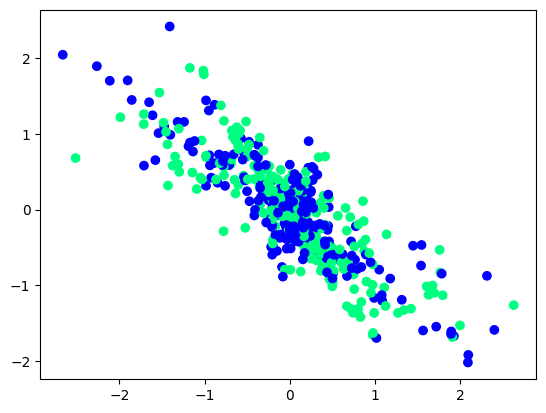

In [163]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')

## Before using optuna

In [164]:
clf_before = DecisionTreeClassifier()

In [165]:
clf_before.fit(X_train,y_train)

DecisionTreeClassifier()

In [166]:
y_pred = clf_before.predict(X_test)
accuracy_score(y_pred,y_test)

0.54

<Axes: >

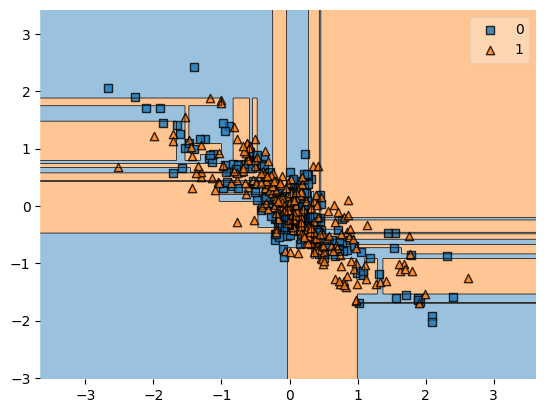

In [167]:
plot_decision_regions(X,y,clf_before)

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [169]:
# DecisionTreeClassifier
# (*, criterion='gini', splitter='best',
# max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
# max_features=None, random_state=None, max_leaf_nodes=None, 
# min_impurity_decrease=0.0,
#  class_weight=None, ccp_alpha=0.0, monotonic_cst=None)


def objective(trial):
    max_depth = trial.suggest_int('max_depth',1,15)
    min_samples_split = trial.suggest_int('min_samples_split',2,20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf',1,20)
    criterion = trial.suggest_categorical('criterion',['gini','entropy'])

    clf = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,min_samples_split=min_samples_split
                               ,min_samples_leaf=min_samples_leaf)
    
    clf.fit(X_train,y_train)

    accuracy = cross_val_score(clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    return accuracy

In [170]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=100)

print(f"best_parameters : {study.best_params}")
print(f"best values: {study.best_value}")

[I 2025-03-17 23:40:54,200] A new study created in memory with name: no-name-08acc83f-b43d-49e7-af7c-fcd875c55394
[I 2025-03-17 23:40:54,275] Trial 0 finished with value: 0.5250000000000001 and parameters: {'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 9, 'criterion': 'entropy'}. Best is trial 0 with value: 0.5250000000000001.
[I 2025-03-17 23:40:54,299] Trial 1 finished with value: 0.5375 and parameters: {'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 9, 'criterion': 'gini'}. Best is trial 1 with value: 0.5375.
[I 2025-03-17 23:40:54,330] Trial 2 finished with value: 0.5625 and parameters: {'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 3, 'criterion': 'entropy'}. Best is trial 2 with value: 0.5625.
[I 2025-03-17 23:40:54,352] Trial 3 finished with value: 0.6224999999999999 and parameters: {'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 9, 'criterion': 'entropy'}. Best is trial 3 with value: 0.6224999999999999.
[I 2025-03-17 23:

best_parameters : {'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 8, 'criterion': 'entropy'}
best values: 0.6425


In [171]:
clf2 = DecisionTreeClassifier(max_depth = 5, min_samples_split= 10, min_samples_leaf= 5, criterion='gini')

In [172]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [173]:
y_pred = clf2.predict(X_test)

In [174]:
accuracy_score(y_pred,y_test)

0.54

<Axes: >

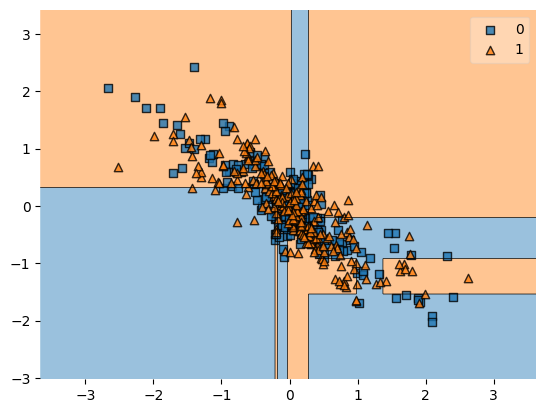

In [175]:
plot_decision_regions(X,y,clf2)

## The accuracy is not that much changed but try with diffrent algorithm to get better results  but overfitting decreases